# Predicting Car Prices

In this project , we'll try to predict a car's market price using its attributes. The data set we will working with contains information on various cars. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Introduction to the Data Set

For each car in the data set we have information about the technical aspects of the vehicle. These are some of the columns of the data set:

* *symboling*: The assigned insurance risk rating.
* *normalized_losses*: The relative average loss payment per insured vehicle year.
* *make*: The make of the vehicle.
* *num_doors*: The number of the car's doors.
* *horsepower*: The power of the car.
* *length*: The length of the car.
* *price*: The price of the car.

The data set contains data on 205 vehicles and as you can see most of the columns name are very clear, they explain well their content. Let's get familiar with the data set: we'll read the data set into a dataframe, determine which columns are numeric and display some rows.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np

#Option to disply all the columns
pd.options.display.max_columns = 27

#Creating the header
header = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=header)

#Showing the dataframe
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Now we'll determine which columns are numeric and can be used as features. We'll select the columns with continuous values that are shown [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [2]:
#Choosing the numeric values columns
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

#Creating the update dataframe
numeric_cars = cars[continuous_cols]

#Showing some rows of the new dataframe
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

If we want to use predictive modeling we can't have any missing values. We can note, from the cell above, that the *normalize-losses* column contains missing values represented using "?". We'll replace these values and look for the presence of missing values in other numeric columns. We'll also rescale the values in numeric columns so they all range from 0 to 1.

In [3]:
#Replacing the values = "?"
numeric_cars = numeric_cars.replace('?', np.nan)

#Showing the changes
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#Changing the types
numeric_cars = numeric_cars.astype('float')

#Showing the changes
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [5]:
#Showing the number of null values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since the *price* column is our target columns we don't want to have any null values in it, so we'll remove any row that contains a null value in the *price* column. For the other null values we have different possibilities:

* Replace the missing values using the average values from that column.
* Drop the rows entirely.
* Drop the column entirely.

Since the null values are few compared to the totality of the values, we'll choose the first option, we'll replace the missing values with the avergae values. Then we'll normalize the values range from 0 to 1, except in the *price* column which is our target column.

In [6]:
#Deleting the rows with null values in "price" column
numeric_cars = numeric_cars.dropna(subset=["price"])

#Replacing the other null values with the average values
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

#Normalizing the columns except the "price" column
prices = numeric_cars["price"]
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars["price"] = prices

#Showing the changes
print(numeric_cars.isnull().sum())
numeric_cars.head()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better. We'll create a function that encapsulates the training and simple validation process, and we'll use this function to train and test univariate models using the different numeric columns in the data set.

In [7]:
#Importing the libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Creating the function
def knn_train_test(train_col, target_col, dataframe):
    
    #Randomize order of the rows 
    np.random.seed(1)
    dataframe = dataframe.reindex(np.random.permutation(dataframe.index))
    
    #Dividing the dataframe into two equals parts
    len_train_df = int(len(dataframe) / 2)
    
    #Selecting the training and the test sets
    train_df = dataframe[:len_train_df].copy()
    test_df = dataframe[len_train_df:].copy()
    
    #Creating the instance of KNeighborsRegressor
    knn = KNeighborsRegressor()
    
    #Fitting a model using the default parameters
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    #Making the predictions
    predictions = knn.predict(test_df[[train_col]])
    
    #Computing and returning RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**(1/2)
    return rmse

#Choosing the columns for the training set
train_cols = numeric_cars.columns.drop("price")

#Creating a series with the RMSE values for all the columns
rmse_columns = {}
for column in train_cols:
    rmse_columns[column] = knn_train_test(column, "price", numeric_cars)

rmse_final = pd.Series(rmse_columns)    
rmse_final.sort_values()  

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

As we can see, the *horsepower* column performed the best using the default k value. Now we'll modify the function to accept a parameter for the k value. We'll using some different k values and visualize the results using a line plot.

In [8]:
#Creating the function
def knn_train_test(train_col, target_col, dataframe, k_values):
    
    #Randomize order of the rows 
    np.random.seed(1)
    dataframe = dataframe.reindex(np.random.permutation(dataframe.index))
    
    #Dividing the dataframe into two equals parts
    len_train_df = int(len(dataframe) / 2)
    
    #Selecting the training and the test sets
    train_df = dataframe[:len_train_df]
    test_df = dataframe[len_train_df:]
    
    k_rmse = {}
    
    for k in k_values:
        #Creating the instance of KNeighborsRegressor
        knn = KNeighborsRegressor(n_neighbors=k)
    
        #Fitting a model using the default parameters
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        #Making the predictions
        predictions = knn.predict(test_df[[train_col]])
    
        #Computing and returning RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(1/2)
        
        #Populating the dictionary
        k_rmse[k] = rmse
        
    return k_rmse

#Choosing the columns for the training set
train_cols = numeric_cars.columns.drop("price")

k_rmse_result = {}
k_values = [1, 3, 5, 7, 9]

#Creating a series with the RMSE values for all the columns
for column in train_cols:
    rmse_val = knn_train_test(column, "price", numeric_cars, k_values)
    k_rmse_result[column] = rmse_val

k_rmse_result 

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

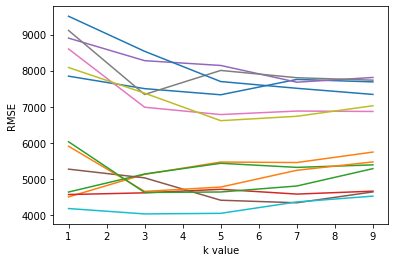

In [9]:
#Importing the library
import matplotlib.pyplot as plt
%matplotlib inline

#Plotting the dictionary with the RMSE of the columns
for k,v in k_rmse_result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel("k value")
    plt.ylabel("RMSE")  

## Multivariate Model

Now we'll modify the "knn_train_test" function to work with multiple columns. We'll allow the function to accept a list of column names instead of just a string and do some attemps with the best columns.

In [10]:
#Finding the best columns computing the average RMSE
average_rmse = {}
for k,v in k_rmse_result.items():
    total = 0
    len_ = 0
    for k1, v1 in v.items():
        total += v1
        len_ += 1
    average_rmse[k] = total / len_   
    
#Showing the results in a series    
series_avg_rmse = pd.Series(average_rmse)
series_avg_rmse = series_avg_rmse.sort_values()  
series_avg_rmse

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

Now we'll modify the function:

* Instead of using just a single column fro train and test, use all the columns passed in.
* Use the default k value from scikit-learn for now (we'll tune the k value in the next step).

In [11]:
#Creating the function
def knn_train_test(train_col, target_col, dataframe, k_values):
    
    #Randomize order of the rows 
    np.random.seed(1)
    dataframe = dataframe.reindex(np.random.permutation(dataframe.index))
    
    #Dividing the dataframe into two equals parts
    len_train_df = int(len(dataframe) / 2)
    
    #Selecting the training and the test sets
    train_df = dataframe[:len_train_df]
    test_df = dataframe[len_train_df:]
    
    k_rmse = {}
    
    for k in k_values:
        #Creating the instance of KNeighborsRegressor
        knn = KNeighborsRegressor(n_neighbors=k)
    
        #Fitting a model using the default parameters
        knn.fit(train_df[train_col], train_df[target_col])
    
        #Making the predictions
        predictions = knn.predict(test_df[train_col])
    
        #Computing and returning RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(1/2)
        
        #Populating the dictionary
        k_rmse[k] = rmse
        
    return k_rmse

k_rmse_results = {}

for n in range(2,6):
    k_rmse_results["{} best features".format(n)] = knn_train_test(
    series_avg_rmse.index[:n], "price", numeric_cars, [5])
    
k_rmse_results    

{'2 best features': {5: 3589.3132622073304},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3358.6915801682458},
 '5 best features': {5: 3665.546673045813}}

## Hyperparameter Tuning

Now we'll optimize the models in the previous step finding the best hyperparameter for each model.

In [12]:
def knn_train_test(train_col, target_col, dataframe, k_values):
    
    #Randomize order of the rows 
    np.random.seed(1)
    dataframe = dataframe.reindex(np.random.permutation(dataframe.index))
    
    #Dividing the dataframe into two equals parts
    len_train_df = int(len(dataframe) / 2)
    
    #Selecting the training and the test sets
    train_df = dataframe[:len_train_df]
    test_df = dataframe[len_train_df:]
    
    k_rmse = {}
    
    for k in k_values:
        #Creating the instance of KNeighborsRegressor
        knn = KNeighborsRegressor(n_neighbors=k)
    
        #Fitting a model using the default parameters
        knn.fit(train_df[train_col], train_df[target_col])
    
        #Making the predictions
        predictions = knn.predict(test_df[train_col])
    
        #Computing and returning RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(1/2)
        
        #Populating the dictionary
        k_rmse[k] = rmse
        
    return k_rmse

k_rmse_results = {}  
k_values = [x for x in range(1,26)]

for n in range(2,6):
    k_rmse_results["{} best features".format(n)] = knn_train_test(
    series_avg_rmse.index[:n], "price", numeric_cars, k_values)

k_rmse_results    

{'2 best features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 '3 best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702

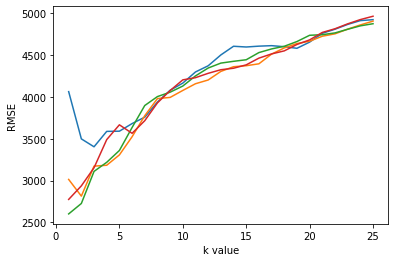

In [13]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel("k value")
    plt.ylabel("RMSE")

## Conclusion

As we can see, the best k values is k=1 for 4 and 5 best features, k=2 for 3 best features and k=3 for the best feature. These are all low value of k, as we increase the number of data point contributing to the label of our new data point, we take into account points that are less and less similar to the point in question. That is why the experiment we ran is so important for KNN algorithm.